In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import copy
import os
import glob

In [3]:
path = os.getcwd() + "/../../data/500g_lc_tc_relationship"
print(path)

/home/kaijunge/Documents/PhD/CREATE Lab Git Repo/tendon-actuation-controller/python/plotting/../../data/500g_lc_tc_relationship


In [4]:
csv_file_loc = glob.glob(os.path.join(path, "*.csv"))

In [5]:
all_data = []

for f in csv_file_loc:
    pos = 0
    for i, char in enumerate(f):
        if char == "/":
             pos = i+1
    filename = f[pos:-4]
    
    print(filename)
    
    if filename != "sq":
        d = np.transpose(np.genfromtxt(f, delimiter=','))
        all_data.append([d[0], d[2]])

test8
sq
test10
test3
test4
test6
test7
test9
test1
test11
test12
test13
test5
test2


In [6]:
cutoff = [10, 20, 26]
slope = [0.1, 7, 40,20]

def current_force_model(current):
    if current < cutoff[0]: 
        return current * slope[0]
    
    elif current < cutoff[1]:
        return (current - cutoff[0]) *slope[1] + (slope[0]*cutoff[0])
    
    elif current < cutoff[2]:
        return (current - cutoff[1]) *slope[2] + (cutoff[1] - cutoff[0]) *slope[1] + (slope[0]*cutoff[0])
    
    else:
        return (current - cutoff[2]) *slope[3] + (cutoff[2] - cutoff[1]) *slope[2] + \
                    (cutoff[1] - cutoff[0]) *slope[1] + \
                        (slope[0]*cutoff[0])

In [7]:
current_pt = np.linspace(0,50,100)
force_pt = np.copy(current_pt)

for i in range(len(force_pt)):
    force_pt[i] = current_force_model(force_pt[i])

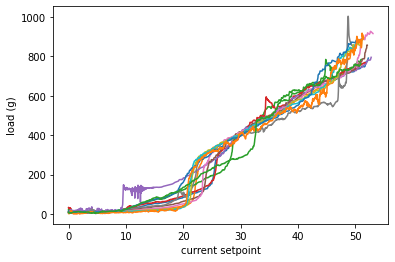

In [11]:
plt.figure()

for data in all_data:
    plt.plot(data[0], data[1])

#plt.plot(current_pt, force_pt, linewidth = 5)
    
plt.xlabel("current setpoint")
plt.ylabel("load (g)")

plt.show()

In [63]:
def find_current_for_force(force):
    for i in range(50):
        f = current_force_model(i)
        if f > force: 
            f_prev = current_force_model(i-1)
            if abs(f - force) > abs(f_prev - force):
                current = i-1
            else:
                current = i
            break
            
    return current

find_current_for_force(100)

21